In [ ]:
import numpy as np
import pandas as pd
import cv2
import os
import PIL

import pathlib
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout, Flatten,Activation, BatchNormalization,MaxPooling2D
from tensorflow.keras import datasets, layers, models
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
!unzip /content/drive/MyDrive/DL_CNN.zip

In [ ]:
data_dir = ("/content/DL_CNN")
print(data_dir)

/content/DL_CNN


In [ ]:
data_dir = pathlib.Path("/content/DL_CNN")
print(data_dir)
list(data_dir.glob('*/*.jpg'))[:5]

/content/DL_CNN


[PosixPath('/content/DL_CNN/Cat/6219.jpg'),
 PosixPath('/content/DL_CNN/Cat/1233.jpg'),
 PosixPath('/content/DL_CNN/Cat/11707.jpg'),
 PosixPath('/content/DL_CNN/Cat/7943.jpg'),
 PosixPath('/content/DL_CNN/Cat/9471.jpg')]

In [ ]:
dogs = list(data_dir.glob('Dog/*'))
dogs[:5]

[PosixPath('/content/DL_CNN/Dog/1225.jpg'),
 PosixPath('/content/DL_CNN/Dog/11769.jpg'),
 PosixPath('/content/DL_CNN/Dog/9317.jpg'),
 PosixPath('/content/DL_CNN/Dog/6141.jpg'),
 PosixPath('/content/DL_CNN/Dog/7677.jpg')]

In [ ]:
cats = list(data_dir.glob('Cat/*'))
cats[:5]

[PosixPath('/content/DL_CNN/Cat/4895.jpg'),
 PosixPath('/content/DL_CNN/Cat/5555.jpg'),
 PosixPath('/content/DL_CNN/Cat/10452.jpg'),
 PosixPath('/content/DL_CNN/Cat/173.jpg'),
 PosixPath('/content/DL_CNN/Cat/1672.jpg')]

In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

13638


In [ ]:
X, Y = [], []

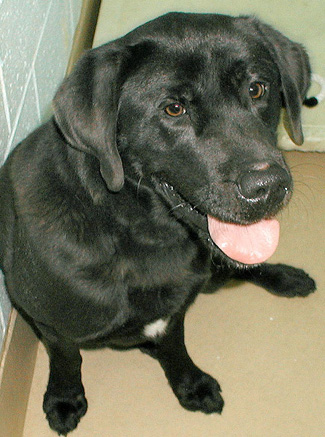

In [ ]:
PIL.Image.open(str(dogs[1]))

In [ ]:
pet_images_dict = {
    'cats': list(data_dir.glob('Cat/*')),
    'dogs': list(data_dir.glob('Dog/*')),
}

pet_labels_dict = {
    'cats': 0,
    'dogs': 1,
}

In [ ]:
IMAGE_WIDTH=150
IMAGE_HEIGHT=150
X, Y = [], []

for pet_name, images in pet_images_dict.items():
    print(pet_name)
    for image in images:
        img = cv2.imread(str(image))
        if isinstance(img,type(None)): 
            #print('image not found')
            continue
            
        elif ((img.shape[0] >= IMAGE_HEIGHT) and  (img.shape[1] >=IMAGE_WIDTH)):
            resized_img = cv2.resize(img,(IMAGE_WIDTH,IMAGE_HEIGHT))
            X.append(resized_img)
            Y.append(pet_labels_dict[pet_name])
        else:
            #print("Invalid Image")
            continue

cats
dogs


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)
print(len(X_train),len(Y_train))
print(len(X_test),len(Y_test))
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape) 
print(Y_test.shape)

9855 9855
3286 3286
(9855, 150, 150, 3)
(9855,)
(3286, 150, 150, 3)
(3286,)


In [ ]:
len(Y_test)

3286

In [ ]:
!nvidia-smi 

Tue Sep  6 13:40:06 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   64C    P0    30W /  70W |   9516MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(8, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(8, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 148, 148, 8)       224       
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 74, 74, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 72, 72, 8)         584       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 36, 36, 8)        0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 10368)             0         
                                                                 
 dense_18 (Dense)            (None, 1)                

In [ ]:
mkdir CNN-Model

mkdir: cannot create directory ‘CNN-Model’: File exists


In [ ]:
backup_dir = "/content/CNN-Model"

In [ ]:
import tensorflow as tf
call_backs = [tf.keras.callbacks.TensorBoard(log_dir='./reduced2'),
              tf.keras.callbacks.BackupAndRestore(backup_dir),
              tf.keras.callbacks.ModelCheckpoint("/content/CNN-Model",monitor="val_loss",save_best_only=True,save_weights_only=True,mode="auto",save_freq="epoch",
    
)]

In [ ]:
model.compile(optimizer="adam",
              loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])
history = model.fit(X_train, Y_train, epochs=10,validation_data=(X_test, Y_test),callbacks = call_backs)

In [ ]:
model.save('cnn_catvsdog.h5')

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  Y_test)

103/103 [==============================] - 1s 6ms/step - loss: 0.2933 - accuracy: 0.9184


In [ ]:
test_acc*100

91.8441891670227

In [ ]:
x = model.predict(X_test)

In [ ]:
x

array([[6.3363340e-04],
       [2.8147912e-03],
       [6.7736238e-01],
       ...,
       [1.4164837e-10],
       [3.4417734e-02],
       [5.2512259e-13]], dtype=float32)

In [ ]:
model.predict(X_test[:2])

array([[0.00063364],
       [0.0028148 ]], dtype=float32)

In [ ]:
print(x[10])

[0.00336265]


In [ ]:
print(x.shape)

(3286, 1)


In [ ]:


x[0]

array([nan], dtype=float32)

In [ ]:
m = ("/content/cnn_catvsdog.h5")
m

'/content/cnn_catvsdog.h5'

In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:

import tensorflow as tf
import datetime

In [ ]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 1851), started 0:26:19 ago. (Use '!kill 1851' to kill it.)

<IPython.core.display.Javascript object>

In [ ]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir logs/fit (started 0:26:20 ago; pid 1851)


In [ ]:
# Control TensorBoard display. If no port is provided, 
# the most recently launched TensorBoard is used
notebook.display(port=6006, height=1000)

Selecting TensorBoard with logdir logs/fit (started 0:26:21 ago; port 6006, pid 1851).


<IPython.core.display.Javascript object>

In [ ]:
!tensorboard dev upload \
  --logdir logs \
  --name "CATVSDOG_CNN" \
  --description "TB" \
  --one_shot


New experiment created. View your TensorBoard at: https://tensorboard.dev/experiment/6vCwHdIBQz2FRurZDzMFdQ/

[2022-09-06T13:54:06] Started scanning logdir.
E0906 13:54:08.151884 140274986567552 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
E0906 13:54:09.177047 140274986567552 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
E0906 13:54:10.147896 140274986567552 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
E0906 13:54:11.166854 140274986567552 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
E0906 13:54:12.143721 140274986567552 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
E0906 13:54:13.140456 140274986567552 uploader.py:1122] Attempted to re-upload existing blob.  Skipping.
[2022-09-06T13:54:13] Total uploaded: 540 scalars, 0 tensors, 1 binary objects (56.3 kB)
Total skipped: 6 binary objects (331.1 kB)
[2022-09-06T13:54:13] Done scanning logdir.


Done. View your TensorBoard at htt

In [ ]:
cat_dir = ("/content/drive/MyDrive/CAT")

In [ ]:
cat_dir = pathlib.Path("/content/drive/MyDrive/CAT")
cat_dir

PosixPath('/content/drive/MyDrive/CAT')

In [ ]:
 d = list(cat_dir.glob('*.jpg'))

In [ ]:
dict = { 'c' : list(cat_dir.glob('*.jpg'))}


In [ ]:
X_t = np.array(d)

In [ ]:
x = model.predict(X_t)

ValueError: ignored

In [ ]:
from PIL import Image
img = Image.fromarray(X_test[10],"RGB")
img.save("test_img.png")
img.show()

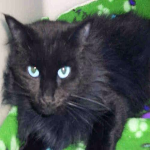

In [ ]:
PIL.Image.open(str("test_img.png"))